Tugas KNN Diabetes.csv
**Kelompok 9**
nama anggota=
1.Rafif Dwi Pradipta (E42240950)
2.Mohammad Nadzim Fawwaz (E42241971)
3.Mohammad Alvin (E42240448)
4.Enggar Widiatama.S (E42242133)
5.Muhammad Bagas Ghifari (E42242118)
6.M.Nurushoba.Q (E42241432)
7.Tyo Erlangga (E42240634)
8.Hibban Mohammad Hashfi (E42241778)


In [111]:
import seaborn as sns

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('diabetes.csv')
data.head()



Saving diabetes.csv to diabetes (7).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [115]:
correlation = data.corr()
correlation['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


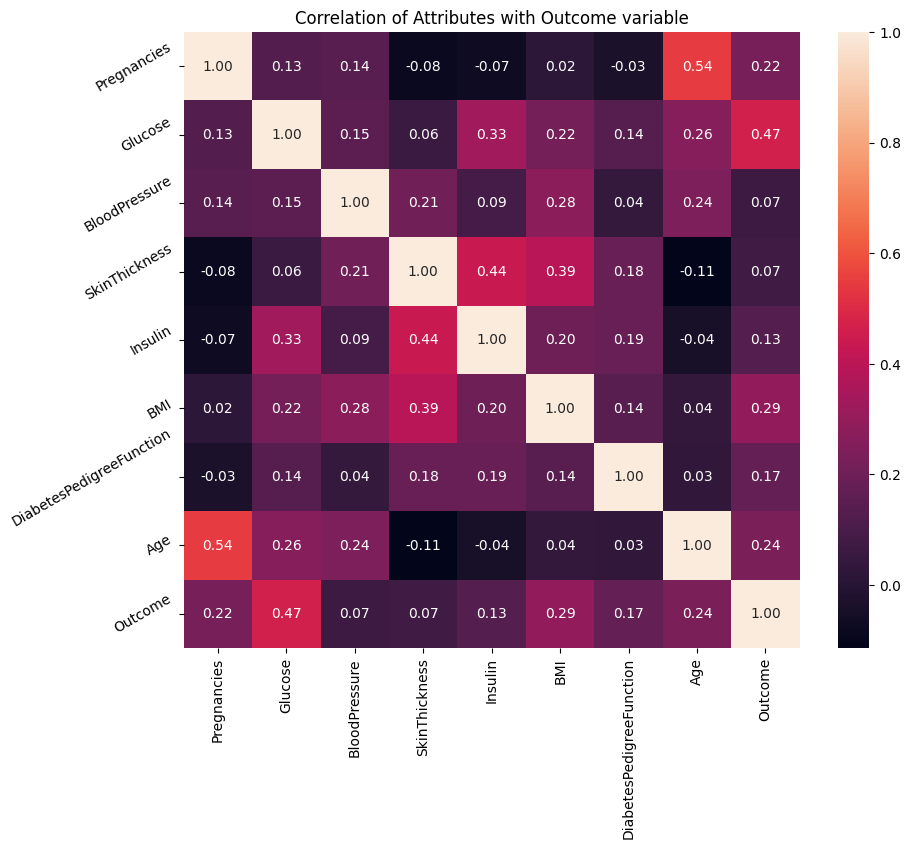

In [116]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Outcome variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [117]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.254231, random_state = 0)
X_train.shape, X_test.shape

((572, 8), (196, 8))

In [120]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,1.530847,0.754432,0.563223,1.597279,0.435886,0.749766,0.498693,0.575118
144,0.046014,1.036107,-0.367337,0.656358,1.773052,0.102477,-0.709354,-0.871374
268,-1.141852,-0.591345,-0.884314,-1.288212,-0.692891,-0.874801,-1.189553,-1.041549
21,1.233880,-0.685236,0.770014,-1.288212,-0.692891,0.432467,-0.253316,1.425995
609,-0.844885,-0.309671,-0.367337,-0.472747,0.887396,-1.014412,-1.008346,-0.871374
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
192,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
629,0.046014,-0.841722,-0.212243,0.091805,-0.692891,-0.925569,-0.978145,-1.041549
559,2.124780,-1.123396,0.253036,-1.288212,-0.692891,-0.240205,-0.519087,0.149679


In [121]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.844885,2.444478,0.356432,1.409094,-0.692891,1.384362,2.784923,-0.956462
122,-0.547919,-0.434859,0.253036,0.593630,0.175399,0.204013,-0.204994,-0.871374
113,0.046014,-1.405071,-0.367337,-1.288212,-0.692891,0.254780,-0.244256,-0.701198
14,0.342981,1.411672,0.149641,-0.096379,0.826616,-0.785957,0.347687,1.511083
529,-1.141852,-0.309671,-0.212243,-1.288212,-0.692891,-0.938260,0.568156,-0.190672
...,...,...,...,...,...,...,...,...
463,0.342981,-1.029505,0.459827,0.593630,-0.692891,-0.557503,-0.645932,0.319855
762,1.530847,-0.998208,-0.367337,-1.288212,-0.692891,-1.204791,-0.996266,-0.020496
127,-0.844885,-0.090591,-0.574128,0.969998,0.123302,0.165937,-0.636871,-0.871374
564,-1.141852,-0.935613,0.563223,-1.288212,-0.692891,0.051710,0.389969,-0.531023


In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [123]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [124]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8061


In [125]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [136]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8061


In [127]:
y_test.value_counts()

,count
Outcome,
0,133
1,63


In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TP) = ', cm[0,0])
print('\nTrue Positives(TN) = ', cm[1,1])
print('\nFalse Negatives(FP) = ', cm[0,1])
print('\nFalse Positives(FN) = ', cm[1,0])

Confusion matrix

 [[117  16]
 [ 22  41]]

True Negatives(TP) =  117

True Positives(TN) =  41

False Negatives(FP) =  16

False Positives(FN) =  22


<Axes: >

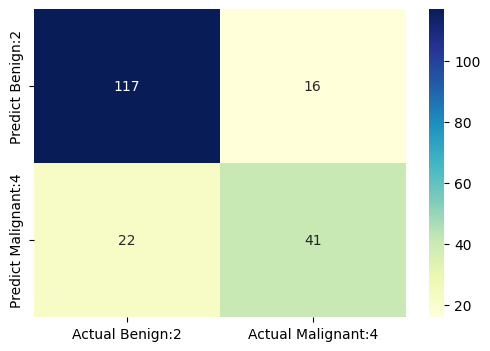

In [129]:
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(cm, columns=['Actual Benign:2', 'Actual Malignant:4'], index=['Predict Benign:2', 'Predict Malignant:4'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       133
           1       0.72      0.65      0.68        63

    accuracy                           0.81       196
   macro avg       0.78      0.77      0.77       196
weighted avg       0.80      0.81      0.80       196



In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.64935065 0.77922078 0.71428571 0.71428571 0.71428571 0.75324675
 0.72727273 0.85714286 0.69736842 0.75      ]


In [132]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.74
